<h3>Analisis Data E-Commerce Menggunakan Python</h3> <br>
Nama : Fransiscus Xaverius Petrus Jonathan Suhargo <br>
Username Dicoding : fransiscus_suhargo_ip7Q <br>
Email : fx.suhargo@gmail.com

### Mengimport Library yang Dibutuhkan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1 Pertanyaan Bisnis

<ol>
<li>Bagaimana tren total penjualan dari bulan ke bulan?
 </li>
<li>Metode Pembayaran apa yang paling sering digunakan?</li>
<li>Negara bagian mana yang memilki pelanggan paling banyak dan paling sedikit?</li>
<li>Kota bagian mana yang memiliki waktu pengantaran paling cepat?</li>
<li>Kategori produk apa yang paling populer pada masing masing kota?</li>
</ol>

### 2 Data Wrangling

### 2.1 Gathering Data pada Dataset E-Commerce

In [3]:
dir = "dataset/"
customers = pd.read_csv(dir+'customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
geolocation = pd.read_csv(dir+"geolocation_dataset.csv")
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
order_items = pd.read_csv(dir+"order_items_dataset.csv")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
order_payments = pd.read_csv(dir+"order_payments_dataset.csv")
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
order_reviews = pd.read_csv(dir+"order_reviews_dataset.csv")
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
orders = pd.read_csv(dir+"orders_dataset.csv")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
product_category = pd.read_csv(dir+"product_category_name_translation.csv")
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
products = pd.read_csv(dir+"products_dataset.csv")
products.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
sellers = pd.read_csv(dir+"sellers_dataset.csv")
sellers.head() 

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### 2.2 Assessing Data

In [12]:
print(customers.info())
print("Jumlah data duplikat:" ,customers.duplicated().sum())
#Dari hasil dapat dilihat bahwa dataset customers tidak memiliki missing value dan tidak memiliki duplikat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
Jumlah data duplikat: 0


In [13]:
print(geolocation.info())
print("Jumlah data duplikat:" ,geolocation.duplicated().sum())
#Dari hasil dapat dilihat bahwa dataset geolocation tidak memiliki missing value akan tetapi memiliki banyak duplikat 
print(geolocation[geolocation.duplicated])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None
Jumlah data duplikat: 261831
         geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
15                              1046       -23.546081       -46.644820   
44                              1046       -23.546081       -46.644820   
65                              1046       -23.546081       -46.644820   
66                              1009       -23.546935       -46.636588   
6

In [14]:
print(order_payments.info())
print(order_payments.describe())
print("Jumlah data duplikat:" ,order_payments.duplicated().sum())
#Dari hasil dapat dilihat bahwa dataset order_payments tidak memiliki missing value dan tidak memiliki duplikat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None
       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1

In [15]:
print(sellers.info())
print(sellers.describe())
print("Jumlah data duplikat:" ,sellers.duplicated().sum())
#Dari hasil dapat dilihat bahwa dataset products tidak memiliki missing value dan tidak memiliki duplikat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None
       seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              64552.500000
max              99730.000000
Jumlah data duplikat: 0


In [16]:
print(product_category.info())
print(product_category.describe())
print("Jumlah data duplikat:" ,product_category.duplicated().sum())
#Dari hasil dapat dilihat bahwa dataset product_category tidak memiliki missing value dan tidak memiliki duplikat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None
       product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1
Jumlah data duplikat: 0


In [17]:
print(products.info())
print(products.describe())

#Menggabungkan nama kategori dengan bahasa inggris
products = products.merge(product_category, left_on="product_category_name",right_on="product_category_name",how="left")

na_count = products.isna().sum()
print(na_count)
print("Jumlah data duplikat:" ,products.duplicated().sum())
#Dari hasil dapat dilihat bahwa dataset products tidak memiliki duplikat akan tetapi memiliki missing value

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64
Jumlah data duplikat: 0


In [18]:
print(orders.info())
print(orders.describe())
print("Jumlah data duplikat:" ,orders.duplicated().sum())
#Dari hasil dapat dilihat bahwa dataset orders tidak memiliki duplikat, namun memiliki missing value pada bagian proses delivery.
#Meskipun demikian tidak ada keanehan dari data tersebut

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     66dea50a8b16d9b

In [19]:
print(order_reviews.info())
print(order_reviews.describe())
print("Jumlah data duplikat:" ,order_reviews.duplicated().sum())
#Dari hasil dapat dilihat bahwa dataset customers tidak memiliki duplikat, namun memiliki missing value pada bagian komentar.
#Meskipun demikian tidak ada keanehan dari data tersebut

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None
       review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Jumlah data duplikat: 0


In [20]:
print(order_items.info())
print(order_items.describe())
print("Jumlah data duplikat:" ,order_items.duplicated().sum())
#Dari hasil dapat dilihat bahwa dataset order_items tidak memiliki missing value dan tidak memiliki duplikat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None
       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%    

#### 2.2.1 Pengecekan Dataset Order Lebih Lanjut <br> 
Perlu dipastikan apakah terdapat missing value apabila semua dataset yang berhubungan dengan order digabungkan 

In [21]:
#Melakukan pengecekan terhadap order_items dan orders
order_has_order_items = orders.merge(order_items, on="order_id", how="left")
order_has_order_items.groupby(by="order_id")
na_count = order_has_order_items.isna().sum()
print(na_count)
#Dapat dilihat bahwa terdapat beberapa orders yang tidak memiliki item sama sekali

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
dtype: int64


In [22]:
#Melakukan pengecekan terhadap order_items dan products
order_items_has_products = order_has_order_items.merge(products, on="product_id", how="left")

order_items_has_products.info()
na_count = order_items_has_products.isna().sum()
#Dapat dilihat bahwa terdapat banyak nilai kosong pada kolom nama produk, dan lain sebagainya
#Maka dari itu perlu dilihat lebih lanjut apakah produk pada order items terdapat dalam dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   customer_id                    113425 non-null  object 
 2   order_status                   113425 non-null  object 
 3   order_purchase_timestamp       113425 non-null  object 
 4   order_approved_at              113264 non-null  object 
 5   order_delivered_carrier_date   111457 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  113425 non-null  object 
 8   order_item_id                  112650 non-null  float64
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

### 2.3 Data Cleaning

In [23]:
print(geolocation[geolocation.duplicated])
#Dapat dilihat bahwa terdapat banyak data yang memiliki zip code prefix dan lokasi yang sama maka kita akan menghapus duplikat tersebut 
geolocation.drop_duplicates(inplace=True)
print("Jumlah data duplikat:" ,geolocation.duplicated().sum())

         geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
15                              1046       -23.546081       -46.644820   
44                              1046       -23.546081       -46.644820   
65                              1046       -23.546081       -46.644820   
66                              1009       -23.546935       -46.636588   
67                              1046       -23.546081       -46.644820   
...                              ...              ...              ...   
1000153                        99970       -28.343273       -51.873734   
1000154                        99950       -28.070493       -52.011342   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
15             sao paulo                SP  
44             sao pa

In [24]:
#Mengubah missing value pada nama kategori produk menjadi uncategorized
products['product_category_name_english'].fillna(value='Uncategorized', inplace=True)
na_count = products.isna().sum()

print(na_count)

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english      0
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_27112\2118625943.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products['product_category_name_english'].fillna(value='Uncategorized', inplace=True)


In [25]:
order_has_order_items[order_has_order_items["order_item_id"].isna()].head()

#Setelah dilihat lebih lanjut dapat dilihat bahwa orders yang tidak memilki id product_item 
# merupakan orders yang di cancel atau unavailable maka dari itu order tersebut akan dihapus

order_has_order_items.dropna(inplace=True)
na_count = order_has_order_items.isna().sum()
print(na_count)

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
dtype: int64


### 3. Exploration Data Analysis 

### 3.1 Menulusuri Customers

In [26]:
#Mengelompokkan pelanggan berdasarkan kota
customer_count = customers.groupby(by="customer_city").count()['customer_unique_id'].sort_values(ascending=False)

In [27]:
#Mengelompokkan pelanggan berdasarkan negara bagian 
c_count = customers.groupby(by="customer_state").count()['customer_unique_id'].sort_values(ascending=False).head(20)
print(c_count)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
Name: customer_unique_id, dtype: int64


### 3.2 Menelusuri Pembayaran

In [28]:
#Mengelompokkan order_payment berdasarkan payment_type
payment_counts = order_payments.groupby(by='payment_type').count()['order_id'].sort_values(ascending=False)
payment_counts = payment_counts[payment_counts.index != "not_defined"]
print(payment_counts)

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: order_id, dtype: int64


In [29]:
#Mengurutkan order_payment berdasarkan pembayaran per transaksi
order_payments.groupby(by="payment_type").agg({
    "payment_value":  ["min", "max", "mean"]
})


payment_value                      
                       min       max        mean
payment_type                                    
boleto               11.62   7274.88  145.034435
credit_card           0.01  13664.08  163.319021
debit_card           13.38   4445.50  142.570170
not_defined           0.00      0.00    0.000000
voucher               0.00   3184.34   65.703354

### 3.3 Menelurusuri Produk

In [30]:
# Mencari tahu kategori produk apa yang paling banyak dijual
category_highest = order_items_has_products.groupby('product_category_name_english').agg({
    'product_id': 'count'  
}).rename(columns={'product_id': 'count'}).sort_values(by='count', ascending=False)

# Mencari tahu kategori produk apa yang paling sedikit dijual
category_lowest = order_items_has_products.groupby('product_category_name_english').agg({
    'product_id': 'count'  
}).rename(columns={'product_id': 'count'}).sort_values(by='count', ascending=True)

# print(category_highest)
print(category_lowest)

                               count
product_category_name_english       
security_and_services              2
fashion_childrens_clothes          8
la_cuisine                        14
cds_dvds_musicals                 14
arts_and_craftmanship             24
...                              ...
computers_accessories           7827
furniture_decor                 8334
sports_leisure                  8641
health_beauty                   9670
bed_bath_table                 11115

[71 rows x 1 columns]


In [31]:
#Mencari 3 kategori yang memiliki penjualan tertinggi pada masing - masing kota
customer_has_order_has_products = customers.merge(order_items_has_products, on='customer_id')
category_highest = customer_has_order_has_products.groupby(['customer_city', 'product_category_name_english']).agg({
    'product_id': 'count'  
}).rename(columns={'product_id': 'count'}).reset_index()

top_3_categories_per_city = category_highest.groupby('customer_city').head(3)


### 3.4 Menelusuri Order

In [32]:
#Negara bagian mana yang memiliki rata-rata waktu pengantaran tercepat
delivered_orders = orders[orders['order_status'] == 'delivered']
customer_has_delivered_orders = delivered_orders.merge(customers, on="customer_id")
#Mengubah data menjadi datetime
customer_has_delivered_orders['order_delivered_carrier_date'] = pd.to_datetime(customer_has_delivered_orders['order_delivered_carrier_date'])
customer_has_delivered_orders['order_delivered_customer_date'] = pd.to_datetime(customer_has_delivered_orders['order_delivered_customer_date'])
#Menghitung waktu pengantaran dan menambahkannya pada dataset
delivery_time = customer_has_delivered_orders['order_delivered_customer_date'] - customer_has_delivered_orders['order_delivered_carrier_date']
customer_has_delivered_orders['delivery_time'] = delivery_time
#Menghapus order dengan delivery time yang negatif
customer_has_delivered_orders = customer_has_delivered_orders[customer_has_delivered_orders['delivery_time'] > pd.Timedelta(0)]
average_delivery_time = customer_has_delivered_orders.groupby('customer_city').agg({
    'delivery_time' : 'mean'
}).sort_values(by='delivery_time', ascending=True).reset_index()

print(average_delivery_time.head(10))



    customer_city   delivery_time
0           bugre 0 days 09:30:05
1          buriti 0 days 17:11:37
2  delfim moreira 1 days 06:00:42
3          bacaxa 1 days 06:24:55
4           moeda 1 days 21:30:45
5  bento de abreu 1 days 22:39:44
6      guamiranga 2 days 00:08:39
7        miraguai 2 days 01:16:24
8          iomere 2 days 10:07:58
9  cambara do sul 2 days 20:42:23


In [33]:
#Bagaimana tren pembelian pada beberapa bulan terakhir
monthly_orders = customer_has_delivered_orders.resample(rule='M', on='order_delivered_customer_date').agg({
    "order_id": "count"
})
print(monthly_orders)

C:\Users\USER\AppData\Local\Temp\ipykernel_27112\163321168.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders = customer_has_delivered_orders.resample(rule='M', on='order_delivered_customer_date').agg({


                               order_id
order_delivered_customer_date          
2016-10-31                          200
2016-11-30                           58
2016-12-31                            4
2017-01-31                          283
2017-02-28                         1345
2017-03-31                         2381
2017-04-30                         1849
2017-05-31                         3751
2017-06-30                         3221
2017-07-31                         3445
2017-08-31                         4295
2017-09-30                         3965
2017-10-31                         4494
2017-11-30                         4669
2017-12-31                         7205
2018-01-31                         6597
2018-02-28                         5850
2018-03-31                         6823
2018-04-30                         7850
2018-05-31                         7111
2018-06-30                         6829
2018-07-31                         5839
2018-08-31                         8314


### 4. Visualisasi Data

#### Pertanyaan 1

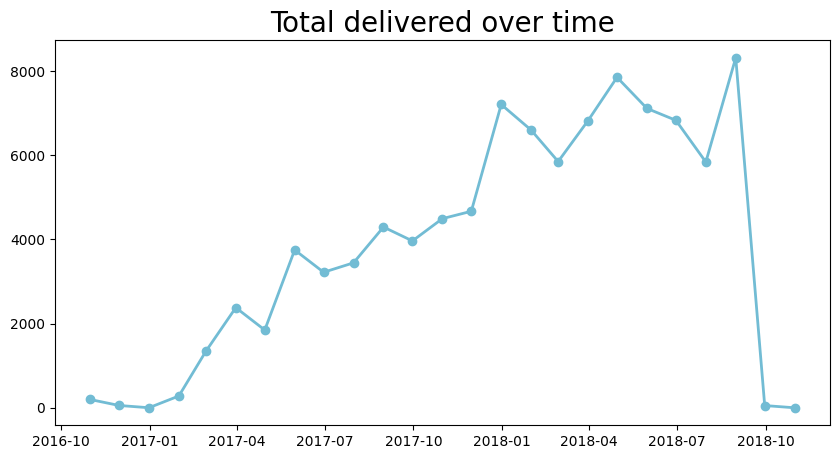

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders.index,
    monthly_orders["order_id"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total delivered over time", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Pertanyaan 2

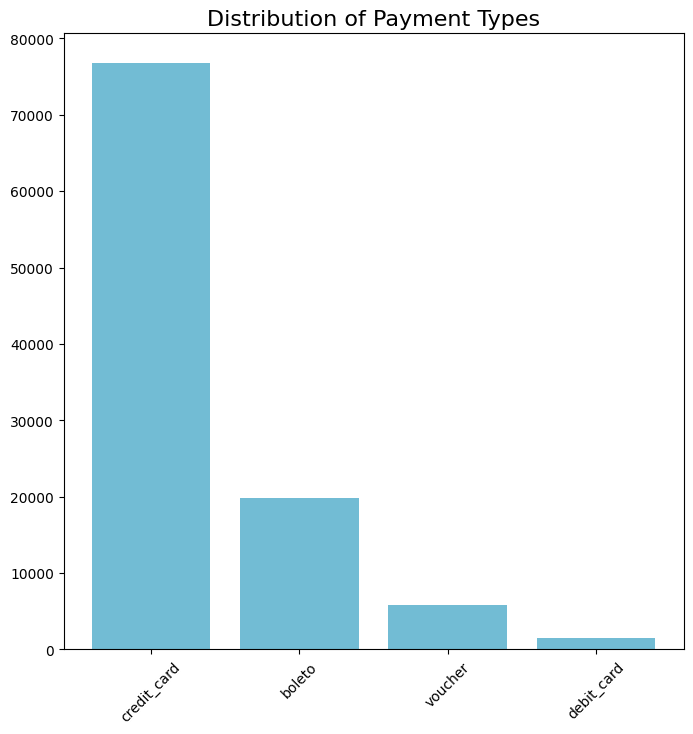

In [36]:
plt.figure(figsize=(8, 8))
plt.bar(x=payment_counts.index, height=payment_counts, color="#72BCD4")
plt.xticks(rotation=45)
plt.title('Distribution of Payment Types', fontsize=16)
plt.show()

#### Pertanyaan 3

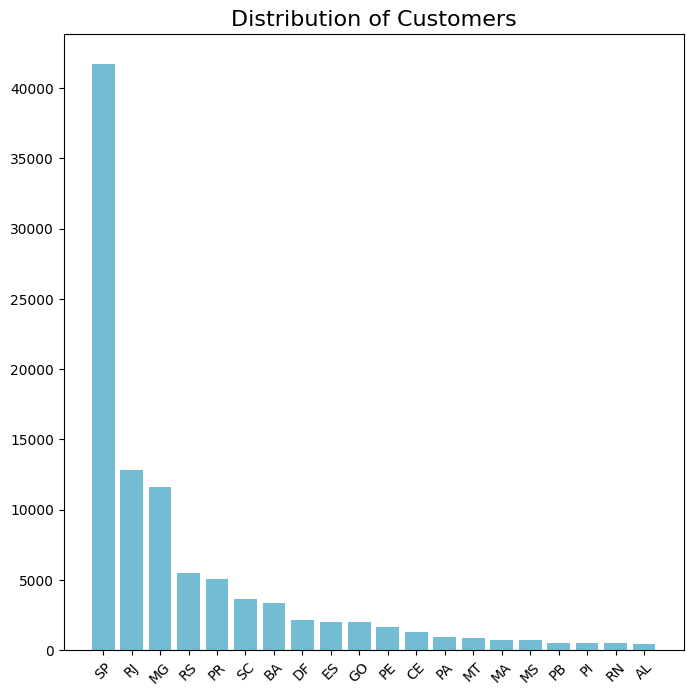

In [37]:
plt.figure(figsize=(8, 8))
plt.bar(x=c_count.index, height=c_count.values, color="#72BCD4")
plt.xticks(rotation=45)
plt.title('Distribution of Customers', fontsize=16)
plt.show()

#### Pertanyaan 4

C:\Users\USER\AppData\Local\Temp\ipykernel_27112\2106387241.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_delivery_time['delivery_time'].head(5),
C:\Users\USER\AppData\Local\Temp\ipykernel_27112\2106387241.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_delivery_time['delivery_time'].head(5),


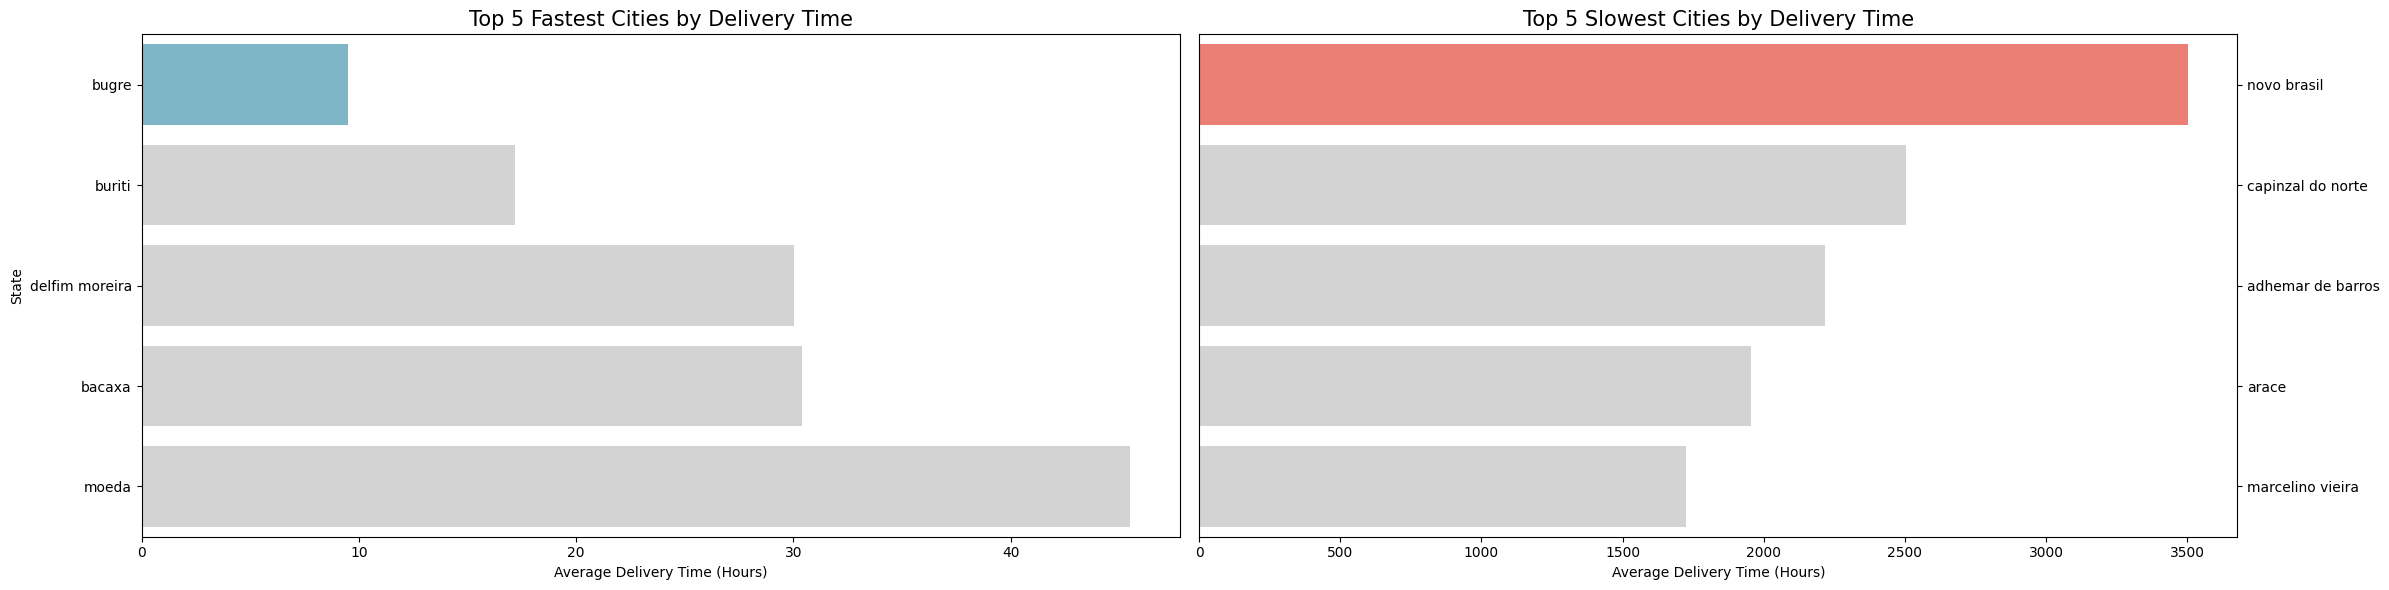

In [42]:
average_delivery_time['delivery_time'] = average_delivery_time['delivery_time'].dt.total_seconds() / 3600  

colors_fastest = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
colors_slowest = ["#FF6F61", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(x=average_delivery_time['delivery_time'].head(5), 
            y=average_delivery_time['customer_city'].head(5), 
            palette=colors_fastest, ax=ax[0])
ax[0].set_title("Top 5 Fastest Cities by Delivery Time", fontsize=15)
ax[0].set_xlabel("Average Delivery Time (Hours)")
ax[0].set_ylabel("State")

average_delivery_time = average_delivery_time.sort_values(by="delivery_time", ascending=False )
sns.barplot(x=average_delivery_time['delivery_time'].head(5), 
            y=average_delivery_time['customer_city'].head(5), 
            palette=colors_slowest, ax=ax[1])
ax[1].set_title("Top 5 Slowest Cities by Delivery Time", fontsize=15)
ax[1].set_xlabel("Average Delivery Time (Hours)")
ax[1].set_ylabel(None)
ax[1].yaxis.tick_right()

plt.tight_layout()
plt.show()


#### Pertanyaan 5

C:\Users\USER\AppData\Local\Temp\ipykernel_27112\2842805744.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_categories_per_city = top_categories_per_city.groupby('customer_city').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)


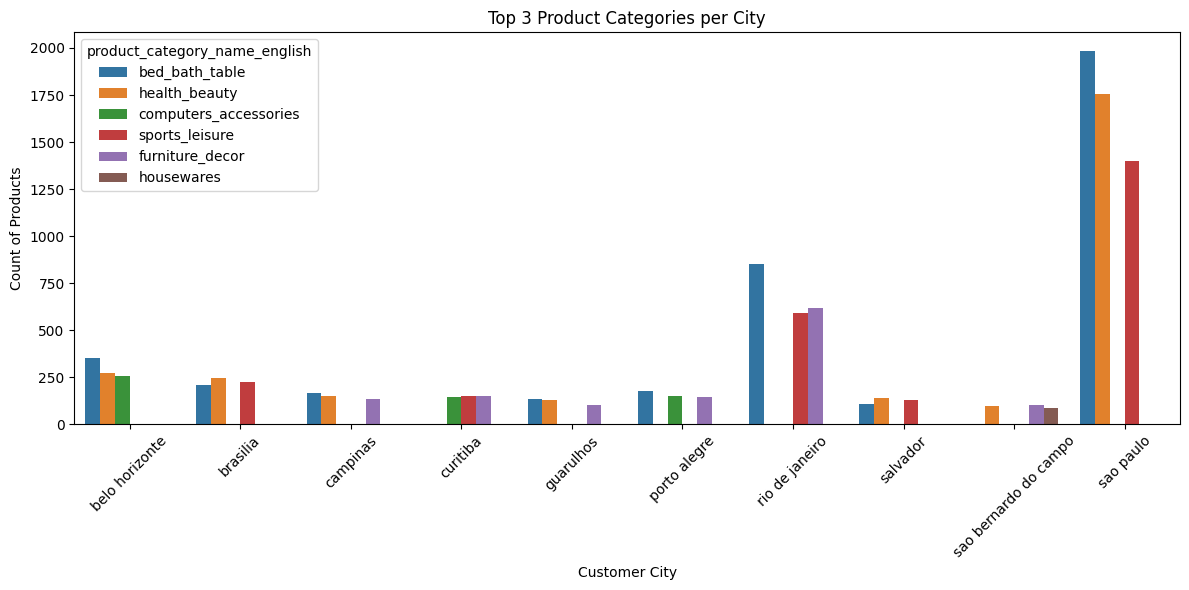

            customer_city product_category_name_english  count
0          belo horizonte                bed_bath_table    351
1          belo horizonte                 health_beauty    274
2          belo horizonte         computers_accessories    256
3                brasilia                 health_beauty    246
4                brasilia                sports_leisure    222
5                brasilia                bed_bath_table    206
6                campinas                bed_bath_table    165
7                campinas                 health_beauty    148
8                campinas               furniture_decor    133
9                curitiba                sports_leisure    152
10               curitiba               furniture_decor    151
11               curitiba         computers_accessories    145
12              guarulhos                bed_bath_table    135
13              guarulhos                 health_beauty    130
14              guarulhos               furniture_decor

In [39]:
#Mencari 3 kategori yang memiliki penjualan tertinggi pada masing - masing kota
top_cities = category_highest.groupby('customer_city')['count'].sum().nlargest(10).index

top_categories_per_city = category_highest[category_highest['customer_city'].isin(top_cities)]
top_3_categories_per_city = top_categories_per_city.groupby('customer_city').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

plt.figure(figsize=(12, 6))

sns.barplot(x='customer_city', y='count', hue='product_category_name_english', data=top_3_categories_per_city)

plt.title('Top 3 Product Categories per City')
plt.xlabel('Customer City')
plt.ylabel('Count of Products')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

print(top_3_categories_per_city)


In [40]:
#Menggabungkan semua data menjadi 1 dataset
all_df = customer_has_order_has_products.merge(order_payments, on="order_id").merge(order_reviews, on="order_id")
all_df.shape
all_df.head()
all_df.to_csv("dashboard/all_data.csv", index=False)

### Conclusion

<ol>
<li>Tren penjualan mengalami kenaikan rutin dari 2016 hingga 2018, akan tetapi kemudian mengalami penurunan drastis pada bulan Oktober tahun 2018
 </li>
<li>Pembayaran menggunakan kartu kredit paling sering digunakan</li>
<li>Negara bagian SP memiliki pelanggan paling banyak dengan jumlah 41746 orang, sedangkan negara bagian RR paling sedikit dengan jumlah 46 orang</li>
<li>Kota bugre memiliki rata rata waktu pengantaran paling cepat dengan waktu 9 jam 30 menit</li>
<li>Pada kota seperti Belo Horizonte beth_bath_table, health_beauty, dan computers_accesories merupakan tiga kategori paling populer, contoh kategori populer lainnya adalah sport_leasure, furniture_decor dan lain sebagainya</li>
</ol>

### Analisis Tambahan 

Selama penggunaan dataset ini ditemukan banyak kejanggalan pada data seperti, transaski barang yang tidak memiliki nama kategori, deskripsi barang, atau bahkan nama barang. Hal tersebut merupakan kejanggalan yang harus diinvestigasi lebih lanjut karena merupakan pemasukan yang tidak diketahui. 